In [1]:
import cv2 as cv
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
def visualize_optical_flow(video_path, skip_frames=5, frame_window=12):
    cap = cv.VideoCapture(video_path)
    ret, first_frame = cap.read()
    if not ret:
        print("Failed to read the video")
        cap.release()
        return

    prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)

    # Set up the plot
    fig, ax = plt.subplots()

    frame_count = 0
    flow_accumulator = np.zeros((first_frame.shape[0], first_frame.shape[1], 2), dtype=np.float32)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        if frame_count % skip_frames == 0:
            if frame_count >= frame_window * skip_frames:
                magnitude, angle = cv.cartToPolar(flow_accumulator[..., 0], flow_accumulator[..., 1])

                hue = (angle * 180 / np.pi / 2).astype(np.uint8)
                saturation = (magnitude * 255 / magnitude.max()).astype(np.uint8)
                value = np.ones_like(hue) * 255

                flow_rgb = cv.merge([hue, saturation, value])
                flow_rgb = cv.cvtColor(flow_rgb, cv.COLOR_HSV2RGB)

                ax.imshow(flow_rgb)
                display(fig)
                clear_output(wait=True)

                flow_accumulator = np.zeros_like(flow_accumulator)

            flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            flow_accumulator += flow

        prev_gray = gray
        frame_count += 1

    cap.release()
    plt.close()

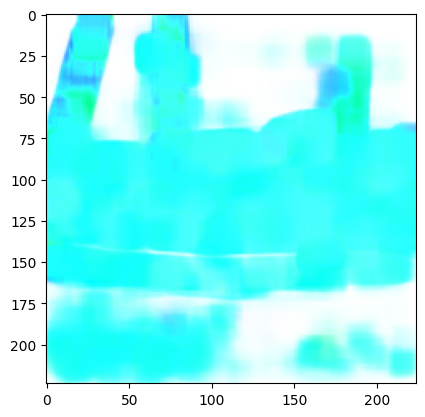

In [5]:
# Call the function with your video path
video_path = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\videos_processed\0110_processed.mp4"
visualize_optical_flow(video_path, skip_frames=5, frame_window=12)